In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks


In [5]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/.git/


In [8]:
!git remote add origin https://github.com/KimaniWanjiru03/Sanitary-Kit-Analysis-UNHCR

In [10]:
!git branch

In [13]:
!git config --global user.email "kimaniwanjiru03@gmail.com"
!git config --global user.name "KimaniWanjiru03"

In [14]:
!git add .
!git commit -m "Initial commit"


[master (root-commit) c694855] Initial commit
 2 files changed, 2 insertions(+)
 create mode 100644 Imma.ipynb
 create mode 100644 Sanitary Kit Analysis UNHCR.ipynb


In [15]:
!git push -u origin master

fatal: could not read Username for 'https://github.com': No such device or address


# General loading and filtering of data


In [1]:
import sys
print("Python version")
print(sys.version)

import pandas as pd
print("Pandas version")
print(pd.__version__)



Python version
3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Pandas version
1.5.3


In [4]:
# Getting the file paths

file_path1 = "Bhar El Naam Clean.xlsx"
file_path2 = "Horseed New.xlsx"
file_path3 = "Vision New.xlsx"

In [5]:
# Getting the sheets

# BHAR EL NAAM PRIMARY SCHOOL KAKUMA
BEN = pd.ExcelFile(file_path1)
sheet_names_BEN = BEN.sheet_names

# HORSEED PRIMARY SCHOOL KAKUMA
HS = pd.ExcelFile(file_path2)
sheet_names_HS = HS.sheet_names

# VISION SECONDARY SCHOOL KAKUMA
VS = pd.ExcelFile(file_path3)
sheet_names_VS = VS.sheet_names

In [6]:
# Storing the sheets in dataframes

# BHAR EL NAAM PRIMARY SCHOOL KAKUMA
data_BEN = {}
for sheet_name in sheet_names_BEN:
    data_BEN[sheet_name] = pd.read_excel(file_path1, sheet_name=sheet_name)

# HORSEED PRIMARY SCHOOL KAKUMA
data_HS = {}
for sheet_name in sheet_names_HS:
    data_HS[sheet_name] = pd.read_excel(file_path2, sheet_name=sheet_name)

# VISION SECONDARY SCHOOL KAKUMA
data_VS = {}
for sheet_name in sheet_names_VS:
    data_VS[sheet_name] = pd.read_excel(file_path3, sheet_name=sheet_name)

In [7]:
# BHAR EL NAAM PRIMARY SCHOOL KAKUMA

# Dataframes on grade 6(2022) to grade 7(2023) students
Grade_67_BEN = data_BEN['Bhar ElNaam Data, Grade 6-7']
Grade_67_BEN = Grade_67_BEN.iloc[:, 1:]

# Dataframes on grade 7(2022) to grade 8(2023) students
Grade_78_BEN = data_BEN['Bhar Elnaam Data, Grade 7-8']
Grade_78_BEN = Grade_78_BEN.iloc[:, 1:]


# HORSEED PRIMARY SCHOOL KAKUMA

# Dataframes on grade 6(2022) to grade 7(2023) students
Grade_67_HS = data_HS['Horseed Data, Grade 6-7']
Grade_67_HS = Grade_67_HS.iloc[:, 1:]

# Dataframes on grade 7(2022) to grade 8(2023) students
Grade_78_HS = data_HS['Horseed Data, Grade 7-8']
Grade_78_HS = Grade_78_HS.iloc[:, 1:]


# VISION SECONDARY SCHOOL KAKUMA

# Dataframes on form 2(2022) to form 3(2023) students
Form_23_VS = data_VS['Vision Sec Form 2-3']
Form_23_VS = Form_23_VS.iloc[:, 1:]


# The Wilcoxon signed-rank test in Python and Visualization of the paired data

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

**1).BHAR EL NAAM PRIMARY SCHOOL (KAKUMA)**

In [7]:
Grade_67_BEN.head()

,NAME,School Days (2022),Days Absent (2022),Days Present (2022),Absentisim rate (2022),School Days (2023),Days Absent (2023),Days Present (2023),Absentisim rate (2023)
0,Akuol Bul Gon,48,10,38,20.833333,55,14.0,41.0,25.454545
1,Martha Ajoh Jok Atuany,48,11,37,22.916667,55,10.0,45.0,18.181818
2,Akol Aleer Bior,48,10,38,20.833333,55,22.0,33.0,40.000000
3,Akoi Alok Deng,48,10,38,20.833333,55,20.0,35.0,36.363636
4,Imran Abdi Ahmed,48,10,38,20.833333,55,27.5,27.5,50.000000


In [8]:
# Extracting relevant columns
intervention_BEN_6_2022 = Grade_67_BEN['Days Absent (2022)']
no_intervention_BEN_7_2023 = Grade_67_BEN['Days Absent (2023)']


intervention_BEN_7_2022 = Grade_78_BEN['Days Absent (2022)']
no_intervention_BEN_8_2023 = Grade_78_BEN['Days Absent (2023)']


**Checking the normality assumption**

In [12]:
from scipy.stats import shapiro

In [10]:
# Grade 7 2023
differences_BEN_67 = no_intervention_BEN_7_2023 - intervention_BEN_6_2022

statistic_BEN_67, p_value_nBEN_67 = shapiro(differences_BEN_67)

# Check the p-value
if p_value_nBEN_67 > 0.05:
    print("The differences are approximately normally distributed (p > 0.05)")
else:
    print("The differences are not normally distributed (p <= 0.05)")

The differences are approximately normally distributed (p > 0.05)


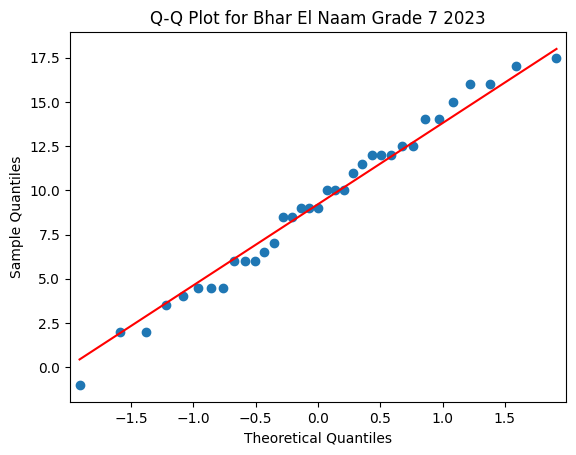

In [11]:
# A QQ Plot to visualize this
import statsmodels.api as sm

differences_BEN_67_new = np.array(differences_BEN_67)

# Generate a theoretical normal distribution for comparison
mean, std_dev = np.mean(differences_BEN_67_new), np.std(differences_BEN_67_new)
theoretical_normal = np.random.normal(mean, std_dev, len(differences_BEN_67_new))

# Create the Q-Q plot
qqplot = sm.qqplot(differences_BEN_67_new, line='s')

# Add a title
plt.title("Q-Q Plot for Bhar El Naam Grade 7 2023")

# Show the plot
plt.show()


In [12]:
# Grade 8 2023
differences_BEN_78 = no_intervention_BEN_8_2023 - intervention_BEN_7_2022

statistic_BEN_78, p_value_nBEN_78 = shapiro(differences_BEN_78)

#Chech p-value

if p_value_nBEN_78 > 0.05:
    print("The differences are approximately normally distributed (p > 0.05)")
else:
    print("The differences are not normally distributed (p <= 0.05)")

The differences are not normally distributed (p <= 0.05)


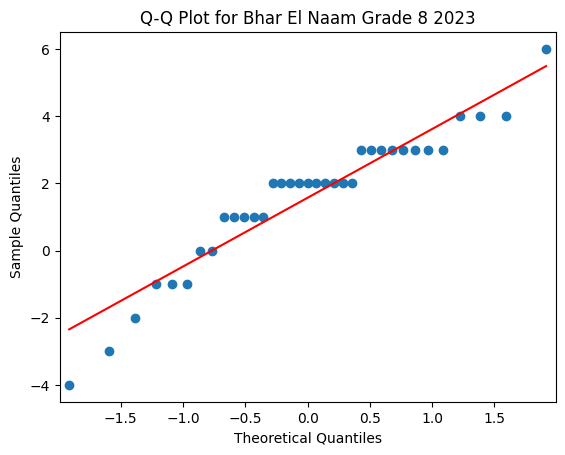

In [13]:
# A QQ Plot to visualize this
differences_BEN_78_new = np.array(differences_BEN_78)

# Generate a theoretical normal distribution for comparison
mean, std_dev = np.mean(differences_BEN_78_new), np.std(differences_BEN_78_new)
theoretical_normal = np.random.normal(mean, std_dev, len(differences_BEN_78_new))

# Create the Q-Q plot
qqplot = sm.qqplot(differences_BEN_78_new, line='s')

# Add a title
plt.title("Q-Q Plot for Bhar El Naam Grade 8 2023")

# Show the plot
plt.show()


**Since the normality test is not obeyed in one of the cases, we will use a non-parametric t-test known as the Wilcoxon signed-rank test**

In [14]:
from scipy.stats import wilcoxon

In [15]:
# Wilcoxon signed-rank test for Grade 7 2023
statistic_BEN_67, p_value_BEN_67 = wilcoxon(intervention_BEN_6_2022, no_intervention_BEN_7_2023)

# Print the t-statistic and p-value
print(f"T-statistic: {statistic_BEN_67}")
print(f"P-value: {p_value_BEN_67}")

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with alpha to make a decision
if p_value_BEN_67 < alpha:
    print("Reject the null hypothesis (There is a significant difference)")
else:
    print("Fail to reject the null hypothesis (No significant difference)")


# The magnitude of the t-statistic is important. Generally,
# a larger absolute value of the t-statistic suggests a stronger evidence against the null hypothesis.
# In this case, a t-statistic of -11.72 is quite large, indicating a significant difference.

T-statistic: 1.0
P-value: 1.1641532182693481e-10
Reject the null hypothesis (There is a significant difference)


In [16]:
# Wilcoxon signed-rank test for Grade 8 2023
statistic_BEN_78, p_value_BEN_78 = wilcoxon(intervention_BEN_7_2022, no_intervention_BEN_8_2023)

# Print the test statistic and p-value
print(f"Test Statistic: {statistic_BEN_78}")
print(f"P-value: {p_value_BEN_78}")

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with alpha to make a decision
if p_value_BEN_78 < alpha:
    print("Reject the null hypothesis (There is a significant difference)")
else:
    print("Fail to reject the null hypothesis (No significant difference)")


Test Statistic: 82.0
P-value: 0.0003463876831053231
Reject the null hypothesis (There is a significant difference)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


**A Graph to show the change in the rate of number of days absent for both grades**




In [17]:
# # Create a figure with subplots
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# # Grade 7 2023
# axs[0].plot(sorted(differences_BEN_67), color='red')
# axs[0].set_xlabel('Number of students')
# axs[0].set_ylabel('Change in days absent')
# axs[0].set_title('Change in days absent for Grade 7 2023 compared to Grade 6 2022')

# # Grade 8 2023
# axs[1].plot(sorted(differences_BEN_78), color='blue')
# axs[1].set_xlabel('Number of students')
# axs[1].set_ylabel('Change in days absent')
# axs[1].set_title('Change in days absent for Grade 8 2023 compared to Grade 7 2022')

# # Adjust layout to prevent overlapping
# plt.tight_layout()

# # Show the plot
# plt.show()


**2).HORSEED PRIMARY SCHOOL (KAKUMA)**

In [18]:
Grade_67_HS.head()

,NAME,School Days (2022),Days Absent (2022),Days Present (2022),Absentisim rate (2022),School Days (2023),Days Absent (2023),Days Present (2023),Absentisim rate (2023)
0,AISHA HAMADI HUSSEIN,65,17,48,26.153846,65,26,39,40.000000
1,AISHA HASSAN,65,45,20,69.230769,65,18,47,27.692308
2,ANITA KASONGO,65,2,63,3.076923,65,27,38,41.538462
3,APOLINA DAUDI,65,1,64,1.538462,65,14,51,21.538462
4,ASMA ABAKAR,65,28,37,43.076923,65,15,50,23.076923


In [19]:
# Extracting relevant columns
intervention_HS_6_2022 = Grade_67_HS['Days Absent (2022)']
no_intervention_HS_7_2023 = Grade_67_HS['Days Absent (2023)']

intervention_HS_7_2022 = Grade_78_HS['Days Absent (2022)']
no_intervention_HS_8_2023 = Grade_78_HS['Days Absent (2023)']

**Checking normality assumption**

In [20]:
# Grade 7 2023
differences_HS_67 = no_intervention_HS_7_2023 - intervention_HS_6_2022

statistic_HS_67, p_value_nHS_67 = shapiro(differences_HS_67)

# Check the p-value
if p_value_nHS_67 > 0.05:
    print("The differences are approximately normally distributed (p > 0.05)")
else:
    print("The differences are not normally distributed (p <= 0.05)")

The differences are not normally distributed (p <= 0.05)


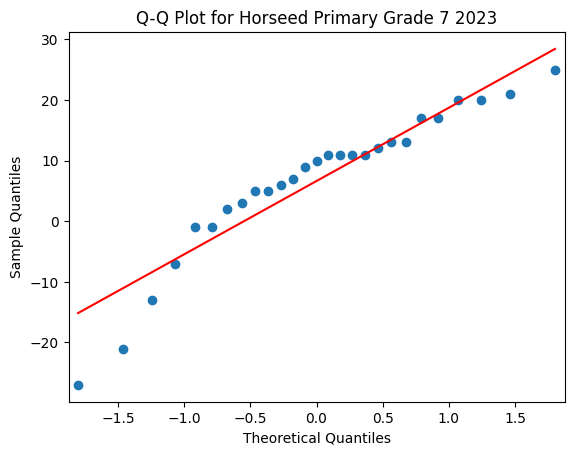

In [21]:
# A QQ Plot to visualize this
import statsmodels.api as sm

differences_HS_67_new = np.array(differences_HS_67)

# Generate a theoretical normal distribution for comparison
mean, std_dev = np.mean(differences_HS_67_new), np.std(differences_HS_67_new)
theoretical_normal = np.random.normal(mean, std_dev, len(differences_HS_67_new))

# Create the Q-Q plot
qqplot = sm.qqplot(differences_HS_67_new, line='s')

# Add a title
plt.title("Q-Q Plot for Horseed Primary Grade 7 2023")

# Show the plot
plt.show()


In [22]:
# Grade 8 2023
differences_HS_78 = no_intervention_HS_8_2023 - intervention_HS_7_2022

statistic_HS_78, p_value_nHS_78 = shapiro(differences_HS_78)

#Chech p-value

if p_value_nHS_78 > 0.05:
    print("The differences are approximately normally distributed (p > 0.05)")
else:
    print("The differences are not normally distributed (p <= 0.05)")

The differences are not normally distributed (p <= 0.05)


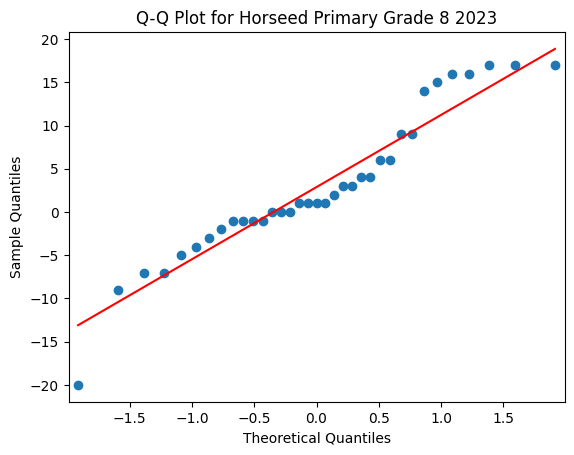

In [23]:
# A QQ Plot to visualize this
differences_HS_78_new = np.array(differences_HS_78)

# Generate a theoretical normal distribution for comparison
mean, std_dev = np.mean(differences_HS_78_new), np.std(differences_HS_78_new)
theoretical_normal = np.random.normal(mean, std_dev, len(differences_HS_78_new))

# Create the Q-Q plot
qqplot = sm.qqplot(differences_HS_78_new, line='s')

# Add a title
plt.title("Q-Q Plot for Horseed Primary Grade 8 2023")

# Show the plot
plt.show()


**Since both Grade 7 2023 and Grade 8 2023 comparisons don't meet the normality assumption, we will use the Wilcoxon Signed-rank test**

In [24]:
# Wilcoxon signed-rank test for Grade 7 2023
statistic_HS_67, p_value_HS_67 = wilcoxon(intervention_HS_6_2022, no_intervention_HS_7_2023)

# Print the t-statistic and p-value
print(f"T-statistic: {statistic_HS_67}")
print(f"P-value: {p_value_HS_67}")

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with alpha to make a decision
if p_value_HS_67 < alpha:
    print("Reject the null hypothesis (There is a significant difference)")
else:
    print("Fail to reject the null hypothesis (No significant difference)")


# The magnitude of the t-statistic is important. Generally,
# a larger absolute value of the t-statistic suggests a stronger evidence against the null hypothesis.
# In this case, a t-statistic of -11.72 is quite large, indicating a significant difference.

T-statistic: 81.0
P-value: 0.008215054869651794
Reject the null hypothesis (There is a significant difference)


In [25]:
# Wilcoxon signed-rank test for Grade 8 2023
statistic_HS_78, p_value_HS_78 = wilcoxon(intervention_HS_7_2022, no_intervention_HS_8_2023)

# Print the test statistic and p-value
print(f"Test Statistic: {statistic_HS_78}")
print(f"P-value: {p_value_HS_78}")

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with alpha to make a decision
if p_value_HS_78 < alpha:
    print("Reject the null hypothesis (There is a significant difference)")
else:
    print("Fail to reject the null hypothesis (No significant difference)")


Test Statistic: 167.5
P-value: 0.07051896114670657
Fail to reject the null hypothesis (No significant difference)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


**A Graph to show the change in the rate of number of days absent for both grades**




In [26]:
# # Create a figure with subplots
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# # Grade 7 2023
# axs[0].plot(sorted(differences_HS_67), color='red')
# axs[0].set_xlabel('Number of students')
# axs[0].set_ylabel('Change in days absent')
# axs[0].set_title('Change in days absent for Grade 7 2023 compared to Grade 6 2022')

# # Grade 8 2023
# axs[1].plot(sorted(differences_HS_78), color='blue')
# axs[1].set_xlabel('Number of students')
# axs[1].set_ylabel('Change in days absent')
# axs[1].set_title('Change in days absent for Grade 8 2023 compared to Grade 7 2022')

# # Adjust layout to prevent overlapping
# plt.tight_layout()

# # Show the plot
# plt.show()


**3). VISION SECONDARY SCHOOL KAKUMA**


In [9]:
Form_23_VS.head()

,NAME,School Days (2022),Days Absent (2022),Days Present (2022),Absentisim rate (2022),School Days (2023),Days Absent (2023),Days Present (2023),Absentisim rate (2023)
0,Nyabire Everlyine,54,8,46,14.814815,60,51,9,85.000000
1,HAalima Asukulo,54,8,46,14.814815,60,11,49,18.333333
2,Nyakenya Gatkuoth,54,8,46,14.814815,60,11,49,18.333333
3,Nyachok Kulang,54,8,46,14.814815,60,11,49,18.333333
4,Nyasunday Both,54,8,46,14.814815,60,15,45,25.000000


In [10]:
# Extracting relevant columns
intervention_VS_2_2022 = Form_23_VS['Days Absent (2022)']
no_intervention_VS_3_2023 = Form_23_VS['Days Absent (2023)']


**Checking normality assumption**

In [13]:
# Form 3 2023
differences_VS_23 = no_intervention_VS_3_2023 - intervention_VS_2_2022

statistic_VS_23, p_value_nVS_23 = shapiro(differences_VS_23)

# Check the p-value
if p_value_nVS_23 > 0.05:
    print("The differences are approximately normally distributed (p > 0.05)")
else:
    print("The differences are not normally distributed (p <= 0.05)")

The differences are approximately normally distributed (p > 0.05)


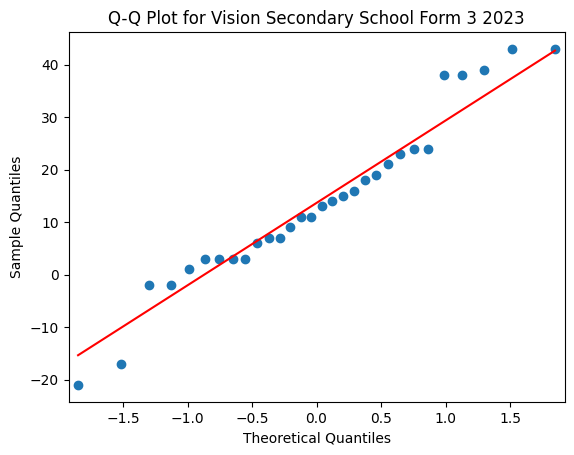

In [14]:
# A QQ Plot to visualize this
import statsmodels.api as sm

differences_VS_23_new = np.array(differences_VS_23)

# Generate a theoretical normal distribution for comparison
mean, std_dev = np.mean(differences_VS_23_new), np.std(differences_VS_23_new)
theoretical_normal = np.random.normal(mean, std_dev, len(differences_VS_23_new))

# Create the Q-Q plot
qqplot = sm.qqplot(differences_VS_23_new, line='s')

# Add a title
plt.title("Q-Q Plot for Vision Secondary School Form 3 2023")

# Show the plot
plt.show()


**Since the data is normaly distributed, we will use the Paired t-test to check for the hypothesis**

In [15]:
# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(intervention_VS_2_2022, no_intervention_VS_3_2023)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant (reject null hypothesis)")
else:
    print("The difference is not statistically significant (fail to reject null hypothesis)")


T-statistic: -4.68963660740564
P-value: 6.006171967422237e-05
The difference is statistically significant (reject null hypothesis)
